# Lettuce Classification Model
#### Developers: ANVI

### Import Libraries and Dependencies

In [1]:
# !pip install tensorflow
# import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
import io
import time

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom, CenterCrop, Rescaling, Resizing
from tensorflow.data import AUTOTUNE
from tensorflow import cast, int64

### Load Data

Setting Directory Paths Accordingly. 
  
 We split the training, validation, and test dataset.
    
    (1) Training Dataset is used to train the neural network directly. The dataset is partitioned by 8:2.
    (2) Validation Dataset is used during the training to assess the performance of the network at various iterations.
    (3) Test Dataset is either a partition of the dataset or the a new dataset entirely that evaluates the performance of our network after completion of the training phase.


In [4]:
path = os.path.abspath(os.getcwd())
test_path, train_path, og_path = path, path, path

path = path + '\\Data_Augmented'
validation_path = og_path + '\\Lettuce'
print('[INFO] Current Path:', og_path)
print('[INFO] Loading data path... ', path)

[INFO] Current Path: C:\Users\empil\Documents\python scripts\cs421
[INFO] Loading data path...  C:\Users\empil\Documents\python scripts\cs421\Data_Augmented


In [11]:
class_names = ['Bacterial', 'Fungal', 'No Disease Detected']

img_size = (227, 227)
size = 227
batch_size = 64
epochs = 30
seed = 42

As we use image_dataset_from_directory function that generates a dataset from the images in the given directory. We can set the image heights and widths to generally resize dimensions for all images to 227x227 pixels, which is part of image preprocessing.

In [6]:
print('Train Data')
train_data = image_dataset_from_directory(
    path,
    image_size = img_size,
    batch_size = batch_size,
    validation_split = 0.2,
    subset = 'training',
    shuffle = True,
    seed = seed,
)

print('\nValidation Data')
validation_data = image_dataset_from_directory(
    validation_path,
    image_size = img_size,
    batch_size = batch_size,
    validation_split = 0.2,
    subset = 'validation',
    shuffle = True,
    seed = seed,
)

print('\nTest Data')
test_data = image_dataset_from_directory(
    path,
    image_size = img_size,
    batch_size = batch_size,
    shuffle = True,
    seed = seed,
)

Train Data
Found 15120 files belonging to 3 classes.
Using 12096 files for training.

Validation Data
Found 15120 files belonging to 3 classes.
Using 3024 files for validation.

Test Data
Found 15120 files belonging to 3 classes.


### Hyper Parameters 

After numerous experimentations with various parameters, we use these as the optimal parameters preferable:
    
    batch_size = 64
    epochs = 30
    class_size = 3 
    
The primary preprocessing transformations that will be imposed on the data presented to the network are:
- normalizing and standardizing the images
- resizing all images that vary in dimensions to a 227x227 dimension. 

In [7]:
def plot_data(dataset):
    plt.figure(figsize = (20, 20))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]], fontsize = 20)
            plt.axis('off')

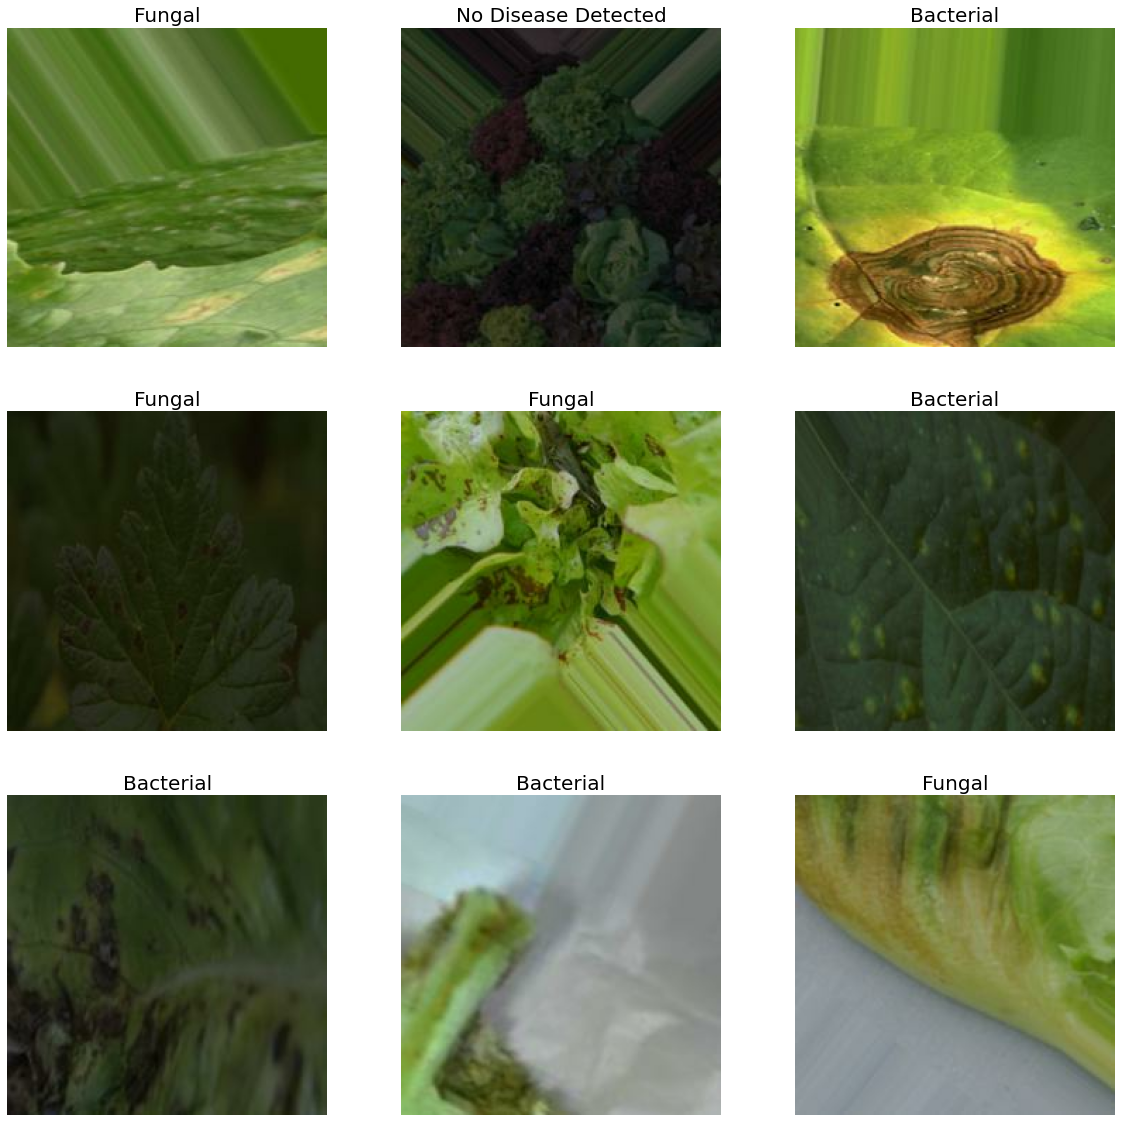

In [8]:
plot_data(train_data)

Subtle preprocessing using Keras

In [13]:
resize_and_rescale = Sequential([
    Resizing(size, size),
    Rescaling(1./255)
])

data_augmentation = Sequential([
  RandomFlip('horizontal_and_vertical'),
  RandomRotation(0.2),
])

In [31]:
model = Sequential()

model.add(resize_and_rescale)
model.add(data_augmentation)

# model.add(Rescaling(1./ 255))

model.add(Conv2D(32, 3, activation = 'relu', input_shape = (size, size, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
# model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))
          
model.add(Conv2D(128, 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
# model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))

model.add(Conv2D(256, 3, activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
# model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

In [32]:
model.compile(
    optimizer = 'adam',
    loss = SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [33]:
start = time.time()
model.fit(
    train_data,
    validation_data = validation_data,
    epochs = 10,
    shuffle = True,
)
print('Time Lapsed:', str(round(time.time() - start, 4)))

Epoch 1/10
189/189 [==============================] - 613s 3s/step - loss: 5.6057 - accuracy: 0.3892 - val_loss: 1.1100 - val_accuracy: 0.4147
Epoch 2/10
189/189 [==============================] - 619s 3s/step - loss: 1.0896 - accuracy: 0.3998 - val_loss: 1.4910 - val_accuracy: 0.4008
Epoch 3/10
189/189 [==============================] - 600s 3s/step - loss: 1.0769 - accuracy: 0.4091 - val_loss: 1.0593 - val_accuracy: 0.4226
Epoch 4/10
189/189 [==============================] - 599s 3s/step - loss: 1.0732 - accuracy: 0.4174 - val_loss: 1.0468 - val_accuracy: 0.4329
Epoch 5/10
189/189 [==============================] - 599s 3s/step - loss: 1.0735 - accuracy: 0.4131 - val_loss: 1.0729 - val_accuracy: 0.4147
Epoch 6/10
189/189 [==============================] - 601s 3s/step - loss: 1.0827 - accuracy: 0.4033 - val_loss: 1.3900 - val_accuracy: 0.4061
Epoch 7/10
189/189 [==============================] - 602s 3s/step - loss: 1.0779 - accuracy: 0.4052 - val_loss: 1.0735 - val_accuracy: 0.4137

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
img_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rescale = 1.0 / 255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    channel_shift_range = 10,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    brightness_range = (0.5, 1.5),
    fill_mode = 'nearest'
)

In [ ]:
train_batch = img_gen.flow_from_directory(
    path,
    target_size = img_size,
    interpolation = 'bicubic',
    class_mode = 'categorical',
    shuffle = True,
    batch_size = batch_size
)

In [ ]:
CROP_LENGTH = 224

In [ ]:
train_crops = crop_generator(train_batch, CROP_LENGTH)

In [ ]:
model.fit_generator(
    train_crops,
    steps_per_epoch = 64,
    validation_data = validation_data,
    validation_steps = 64,
    epochs = 30
)

In [ ]:
from skimage.io import imread
from PIL import Image

# DO NOT REPEAT RUNNING CODE. EXISTING AUGMENTED FILES
augmented_data = []

def augment_data(dataset):
    for i, image_name in enumerate(dataset):    
        if (image_name.split('.')[1] == 'jpg'):        
            image = imread(train_path + '\\' + image_name)        
            image = Image.fromarray(image, 'RGB')        
            image = image.resize((img_height, img_width)) 
            augmented_data.append(np.array(image))

In [ ]:
to_augment = os.listdir(train_path)
augmented_train_data = augment_data(to_augment)

In [ ]:
x = np.array(augmented_data)
i = 0

In [ ]:
start = time.time()
for batch in img_gen.flow(x, batch_size = batch_size, save_to_dir = og_path + '\\Augmented_Data', save_prefix ='dr',  save_format ='jpg'):    
    i += 1    
    if i > 50:        
        break
end = time.time()
print('Process: '+ str(round(end - start, 4)) + ' milliseconds')

## Defining the Model

We define the layers of the model, configure each layer with a number of nodes and activation function, and connecting all the layers into a cohesive model. 

The activation function used for each convolutional layer is Rectified Linear Unit (ReLU).

In [ ]:
for data, labels in train_data.take(1):
    print(data.shape)
    print(labels.shape)

In [ ]:
input_shape = (227, 227, 3)

In [ ]:
model = Sequential()

input_shape = input_shape
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1

# preprocessing layer that rescales input values to 1./255 (input from the [0, 255] range to [0, 1])
model.add(Rescaling(1./255))

# applying filters and kernel size parameters, initially to 16 and 3, respectively 
# to learn the features of the training data, and the activation function set to rectified linear unit (ReLU)
model.add(Conv2D(16, 3, activation = 'relu', input_shape = input_shape))
model.add(BatchNormalization(axis = chanDim))

# downsizes the input along its spatial dimensions (height and width) by taking the max value over
# an input window for each channel of the input
model.add(MaxPooling2D())

#repeat two layers by adjusting filter size from 16 to 32 and 64
model.add(Conv2D(32, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
# added dropout layer to reduce overfitting wherein 50% of inputs will be dropped 
# each update to the model
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
# added dropout layer to reduce overfitting wherein 50% of inputs will be dropped 
# each update to the model
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.summary()

## Compiling the Model
As we compile the model, the loss function we would optimize is SparseCategoricalCrossentropy for multi-class classification since we have two classifications for the study, and the optimizer used is the Stochastic Gradient Descent (SGD).

In [ ]:
# optimizer used: SGD, which is a gradient descent w/ momentum optimizer, similar method used in MatLab
# learning rate initially set to 0.01
model.compile(
    optimizer = 'sgd',
    loss = SparseCategoricalCrossentropy(), # should be categorical only
    metrics = ['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard 

root_logdir = os.path.join(os.curdir, 'logs\\fit\\')
def get_run_logdir():
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = TensorBoard(run_logdir)

## Fitting the Model
Our training configuration:

    no. of epochs = 30
    batch size = 64

In [ ]:
history = model.fit_generator(
    img_gen.flow(train_data, batch_size = batch_size),
    validation_data = validation_data,
    steps_per_epoch = len(train_data) / batch_size,
    epochs = 30, verbose = 1
    )

In [ ]:
# epochs are manually adjusted, however, to mimic MatLab parameters, epoch set 30

model.fit(train_data, validation_data = validation_data, epochs = 30, callbacks = [tensorboard_cb])

In [ ]:
model.summary()

## Evaluating the Model
Using our test data in evaluating the classifier to get an unbiased estimate of the performance of the model.

In [ ]:
loss = model.evaluate(test_data)
loss

In [ ]:
import numpy
plt.figure(figsize= (15,15))
for images, labels in test_data.take(1):
    classifications = model(images)
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        index = numpy.argmax(classifications[i])
        plt.title('\nPrediction: ' + class_names[index] + ' \n Real: ' + class_names[labels[i]])